<h1 style="font-family: Trebuchet MS; font-size: 14px; color: #6c584c; text-align: right; ">Created By: Zubair Atha</h1>

<h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #273e47; text-align: center"><b>Weighted Similarity</b><br><span style="color: #D92919; font-size: 25px">Proposed Agile Recommender System</span></h1>
<hr>
<h1><b><span style="color: #E94B3C; font-size: 28px">TABLE OF CONTENTS</span></b></h1>

* [Problem Statement](#0)
* [Proposed Method](#1)
* [Preparation](#2)
* [Data Analysis](#3)
* [Data Cleaning](#4)
* [Data Visualization](#5)
* [Word Embeddings](#6)
* [Weighted Features](#7)
* [Generating Recommendations](#8)
* [Conclusion](#9)

<a id="0"></a>
<h1><b><span style="color: #E94B3C; font-size: 28px">PROBLEM STATEMENT</span></b></h1>

<!-- 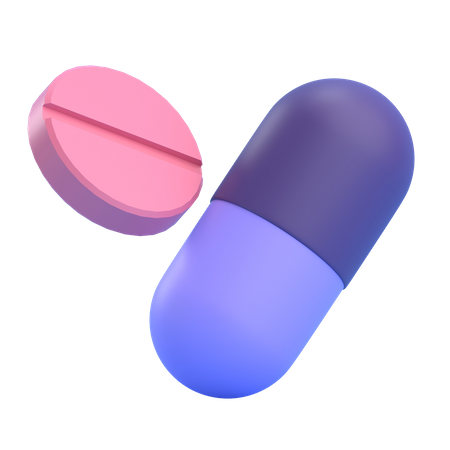 -->
<img src="https://cdn3d.iconscout.com/3d/premium/thumb/medicine-3494848-2928740.png" width="250px" height="250px">


<p style="color: #6c584c; font-size: 16px">Traditional recommender systems heavily rely on user data to generate personalized recommendations. However, in certain domains, such as medicine, obtaining user-specific information can be challenging due to privacy concerns or limited availability of data.</p>
<p style="color: #6c584c; font-size: 16px">Hence, the problem at hand is twofold:</p>
<ol>
  <li style="color: #6c584c; font-size: 16px">The lack of user data poses challenges in developing recommender systems that can provide accurate and personalized recommendations without compromising privacy.</li>
  <li style="color: #6c584c; font-size: 16px">The absence of composition-based similarity as a key factor in traditional recommender systems limits their effectiveness in the domain of medicine, where it is crucial to consider the composition of drugs when generating recommendations.</li>
</ol>

<a id="1"></a>
<h1><b><span style="color: #E94B3CFF; font-size: 28px">PROPOSED METHOD</span></b></h1>

<p style="color: #6c584c; font-size: 16px">To address the challenges posed by traditional recommender systems in the domain of medicine, I propose a novel approach called Weighted Similarities, which enables the generation of accurate and relevant recommendations without relying on user-specific data.</p>
<ol>
  <li style="color: #6c584c; font-size: 16px">Feature Extraction:<br>
    Extract relevant features from the medicine dataset. The key attribute we focus on is the composition of the drugs.</li>
  <li style="color: #6c584c; font-size: 16px">Weight Assignment:<br>
    Assigning appropriate weights to each feature is a critical aspect of the Weighted Similarities method. The weights reflect the significance of each attribute in determining the similarity between medicines. For example, the composition might carry more weight than other attributes.</li>
  <li style="color: #6c584c; font-size: 16px">Recommendation Generation:<br>
    Using the assigned weights, we calculate the similarity scores between the target medicine and the other medicines in the dataset. The medicines with the highest similarity scores are then recommended as suitable alternatives.</li>
</ol>

<a id="2"></a>
<h1><b><span style="color: #E94B3C; font-size: 28px">PREPARATION</span></b></h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import plotly.graph_objects as go
import plotly.express as px

In [2]:
df = pd.read_csv('A_Z_medicines_dataset_of_India.csv')
df.head(10)

,id,name,price(₹),Is_discontinued,manufacturer_name,type,pack_size_label,short_composition1,short_composition2
0,1,Augmentin 625 Duo Tablet,223.42,False,Glaxo SmithKline Pharmaceuticals Ltd,allopathy,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg)
1,2,Azithral 500 Tablet,132.36,False,Alembic Pharmaceuticals Ltd,allopathy,strip of 5 tablets,Azithromycin (500mg),NaN
2,3,Ascoril LS Syrup,118.00,False,Glenmark Pharmaceuticals Ltd,allopathy,bottle of 100 ml Syrup,Ambroxol (30mg/5ml),Levosalbutamol (1mg/5ml)
3,4,Allegra 120mg Tablet,218.81,False,Sanofi India Ltd,allopathy,strip of 10 tablets,Fexofenadine (120mg),NaN
4,5,Avil 25 Tablet,10.96,False,Sanofi India Ltd,allopathy,strip of 15 tablets,Pheniramine (25mg),NaN
5,6,Allegra-M Tablet,241.48,False,Sanofi India Ltd,allopathy,strip of 10 tablets,Montelukast (10mg),Fexofenadine (120mg)
6,7,Amoxyclav 625 Tablet,223.27,False,Abbott,allopathy,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg)
7,8,Azee 500 Tablet,132.38,False,Cipla Ltd,allopathy,strip of 5 tablets,Azithromycin (500mg),NaN
8,9,Atarax 25mg Tablet,85.50,False,Dr Reddy's Laboratories Ltd,allopathy,strip of 15 tablets,Hydroxyzine (25mg),NaN
9,10,Ascoril D Plus Syrup Sugar Free,129.00,False,Glenmark Pharmaceuticals Ltd,allopathy,bottle of 100 ml Syrup,Phenylephrine (5mg),Chlorpheniramine Maleate (2mg)


<a id="3"></a>
<h1><b><span style="color: #E94B3C; font-size: 28px">DATA ANALYSIS</span></b></h1>

In [3]:
df.shape

(253973, 9)

<h1><b><span style="color: #6c584c; font-size: 16px">Data Shape insights:</span></b></h1>

- Rows: 253973
- Columns: 9
- Phew, huge dataset - Let's do this.

In [4]:
# Unique values
print('Unique Values per column:')
for i in df.columns:
    print(f'{i} → {df[i].nunique()}')

Unique Values per column:
id → 253973
name → 249398
price(₹) → 20664
Is_discontinued → 2
manufacturer_name → 7648
type → 1
pack_size_label → 1929
short_composition1 → 8523
short_composition2 → 2980


In [5]:
# Missing data
print('Missing data per column')
df.isnull().sum()

Missing data per column


id                         0
name                       0
price(₹)                   0
Is_discontinued            0
manufacturer_name          0
type                       0
pack_size_label            0
short_composition1         0
short_composition2    141802
dtype: int64

<h1><b><span style="color: #6c584c; font-size: 16px">Missing data insights</span></b></h1>

- 'short_composition2' seems to have a large amount of missing values, can we drop it?
- No we cannot, composition of medicines (primary/secondary) is of the highest importance for the problem at hand.
- A fix for this will be demonstrated down the notebook.

<a id="4"></a>
<h1><b><span style="color: #E94B3C; font-size: 28px">DATA CLEANING</span></b></h1>

In [6]:
# Dropping unncecessary columns

# 'type' column has only 1 value and will not have an effect on the final model
df=df.drop(columns=['type'])

# Discontinued medicines and the column must be dropped as the model needs to be frictionless
# 'id' can also be dropped
df = df[df.Is_discontinued==False]
df=df.drop(columns=['Is_discontinued','id'])

In [7]:
df.head()

,name,price(₹),manufacturer_name,pack_size_label,short_composition1,short_composition2
0,Augmentin 625 Duo Tablet,223.42,Glaxo SmithKline Pharmaceuticals Ltd,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg)
1,Azithral 500 Tablet,132.36,Alembic Pharmaceuticals Ltd,strip of 5 tablets,Azithromycin (500mg),NaN
2,Ascoril LS Syrup,118.00,Glenmark Pharmaceuticals Ltd,bottle of 100 ml Syrup,Ambroxol (30mg/5ml),Levosalbutamol (1mg/5ml)
3,Allegra 120mg Tablet,218.81,Sanofi India Ltd,strip of 10 tablets,Fexofenadine (120mg),NaN
4,Avil 25 Tablet,10.96,Sanofi India Ltd,strip of 15 tablets,Pheniramine (25mg),NaN


In [8]:
# Exploring the 'pack_size_label' column
form=[]
count={}
for i in df.pack_size_label:
    words=i.split()
    x=words[-1].lower()
    if len(x)<=2:
        x=words[-2].lower()
    if x in form:
        count[x]+=1
    else:
        count[x]=1
        form.append(x)

sorted_count = dict(sorted(count.items(), key=lambda x:x[1], reverse=True))
print(sorted_count)

{'tablets': 129641, 'injection': 30931, 'tablet': 18270, 'syrup': 16409, 'capsules': 15236, 'suspension': 9011, 'capsule': 6202, 'cream': 4863, 'drop': 3697, 'solution': 1625, 'gel': 1580, 'ointment': 1574, 'drops': 1388, 'lotion': 989, 'infusion': 836, 'soap': 515, 'powder': 344, 'spray': 331, 'expectorant': 321, 'shampoo': 261, 'kit': 229, 'inhaler': 211, 'wash': 193, 'liquid': 140, 'injections': 126, 'granules': 115, 'respules': 111, 'suppositories': 70, 'rotacaps': 51, 'sachet': 51, 'gargle': 51, 'patches': 47, 'strips': 37, 'suppository': 32, 'paint': 32, 'inhalation': 28, 'syringe': 27, 'strip': 25, 'respicaps': 24, 'transcaps': 23, 'emulsion': 22, 'lozenges': 21, 'linctus': 19, 'pessaries': 18, 'transhaler': 18, 'paste': 17, 'combikit': 17, 'bottles': 16, 'toothpaste': 16, 'patch': 16, 'suspensions': 12, 'gums': 12, 'transpules': 11, 'combipack': 9, 'scrub': 9, 'solutions': 9, 'serum': 9, 'jelly': 8, 'lacquer': 7, 'tabcaps': 7, 'sachets': 7, 'enema': 7, 'syrups': 6, 'husk': 6, '

In [9]:
# Fix: removing the plural issue (eg: tablet | tablets)
final_count=sorted_count.copy()
for key,value in sorted_count.items():
    test=(key+'s') in final_count
    if test:
        final_count[key]+=final_count[key+'s']
        del final_count[key+'s']
        form.remove(key+'s')
        
final_count = dict(sorted(final_count.items(), key=lambda x:x[1], reverse=True))
print(final_count)

{'tablet': 147911, 'injection': 31057, 'capsule': 21438, 'syrup': 16415, 'suspension': 9023, 'drop': 5085, 'cream': 4867, 'solution': 1634, 'gel': 1581, 'ointment': 1574, 'lotion': 990, 'infusion': 837, 'soap': 515, 'powder': 344, 'spray': 331, 'expectorant': 321, 'shampoo': 262, 'kit': 229, 'inhaler': 211, 'wash': 193, 'liquid': 140, 'granules': 115, 'respules': 111, 'suppositories': 70, 'strip': 62, 'sachet': 58, 'rotacaps': 51, 'gargle': 51, 'patches': 47, 'suppository': 32, 'paint': 32, 'inhalation': 28, 'syringe': 27, 'respicaps': 24, 'transcaps': 23, 'emulsion': 23, 'lozenges': 21, 'linctus': 19, 'pessaries': 18, 'transhaler': 18, 'paste': 17, 'combikit': 17, 'bottle': 17, 'toothpaste': 16, 'patch': 16, 'gum': 14, 'transpules': 11, 'combipack': 9, 'scrub': 9, 'serum': 9, 'jelly': 8, 'lacquer': 7, 'tabcaps': 7, 'enema': 7, 'husk': 6, 'liniment': 6, 'cartriges': 6, 'caplets': 5, 'redicaps': 5, 'instacap': 5, 'pastilles': 4, 'foam': 4, 'nexcaps': 4, 'pellets': 4, 'pouch': 4, 'elixir

<h1><b><span style="color: #6c584c; font-size: 16px">Creating new columns</span></b></h1>

- <b>type</b>: type of medicine (tablet, syrup, etc.)
- <b>primary_comp</b>: text extracted from from 'short_composition1' 
- <b>entire_comp</b>: 'primary_comp' + text extracted from from 'short_composition2'
- <b>value</b>: compostion metrics extracted from 'short_composition1' (Eg: 500mg)
- <b>entire_value</b>: value + compostion metrics extracted from 'short_composition1' (Eg: 125mg) (Note: This is text data)

In [10]:
def getType(row):  
    for type in form:
        if type in row['pack_size_label'].lower():
            return type  
def getComp(row):  
    return row['short_composition1'].split('(')[0].lower().rstrip()

def getValue(row):  
    return row['short_composition1'].split('(')[1].lower().rstrip().rstrip(')')


df['type'] = df.apply(lambda row: getType(row), axis=1)
df['primary_comp'] = df.apply(lambda row: getComp(row), axis=1)
df['entire_comp'] =  df['primary_comp'] + ' ' + np.where(df['short_composition2'].isna(), '',
                                                         df['short_composition2'].astype(str).apply(lambda x: x.split('(')[0].lower().rstrip()))
df['value'] = df.apply(lambda row: getValue(row), axis=1)
df['entire_value'] =  df['value'] + ' ' + np.where(df['short_composition2'].isna(), '',
                                                   df['short_composition2'].astype(str).apply(lambda x: x.split('(')[1].lower().rstrip().rstrip(')') if len(x.split('(')) > 1 else ''))

In [11]:
# Drop redundant columns
dataset = df.drop(columns=['pack_size_label','short_composition1','short_composition2'])

In [12]:
dataset.head(10)

,name,price(₹),manufacturer_name,type,primary_comp,entire_comp,value,entire_value
0,Augmentin 625 Duo Tablet,223.42,Glaxo SmithKline Pharmaceuticals Ltd,tablet,amoxycillin,amoxycillin clavulanic acid,500mg,500mg 125mg
1,Azithral 500 Tablet,132.36,Alembic Pharmaceuticals Ltd,tablet,azithromycin,azithromycin,500mg,500mg
2,Ascoril LS Syrup,118.00,Glenmark Pharmaceuticals Ltd,syrup,ambroxol,ambroxol levosalbutamol,30mg/5ml,30mg/5ml 1mg/5ml
3,Allegra 120mg Tablet,218.81,Sanofi India Ltd,tablet,fexofenadine,fexofenadine,120mg,120mg
4,Avil 25 Tablet,10.96,Sanofi India Ltd,tablet,pheniramine,pheniramine,25mg,25mg
5,Allegra-M Tablet,241.48,Sanofi India Ltd,tablet,montelukast,montelukast fexofenadine,10mg,10mg 120mg
6,Amoxyclav 625 Tablet,223.27,Abbott,tablet,amoxycillin,amoxycillin clavulanic acid,500mg,500mg 125mg
7,Azee 500 Tablet,132.38,Cipla Ltd,tablet,azithromycin,azithromycin,500mg,500mg
8,Atarax 25mg Tablet,85.50,Dr Reddy's Laboratories Ltd,tablet,hydroxyzine,hydroxyzine,25mg,25mg
9,Ascoril D Plus Syrup Sugar Free,129.00,Glenmark Pharmaceuticals Ltd,syrup,phenylephrine,phenylephrine chlorpheniramine maleate,5mg,5mg 2mg


<b>Et voilà! our data looks much better</b>

<a id="5"></a>
<h1><b><span style="color: #E94B3C; font-size: 28px">DATA VISUALIZATION</span></b></h1>

In [13]:
# Initialize the initial column to be displayed
initial_column = 'manufacturer_name'
counts = dataset[initial_column].value_counts()[:11]

# Create a bar chart using Plotly
color_start = 'rgb(76, 75, 22)'
color_end = 'rgb(247, 241, 229)'
fig = px.bar(dataset, x=counts.index, y=counts.values,color=counts.values, color_continuous_scale='sunset')

fig.update_layout(
    title='Distribution of Features',
    xaxis_title='Unique Values (Top 10)',
    yaxis_title='Count',
    plot_bgcolor='white'  
)
fig.update_layout(barmode='group')
columns = ['manufacturer_name','type', 'primary_comp','entire_comp', 'value','entire_value' ]
buttons = []
for column in columns:
    button = dict(
        label=column,
        method='update',
        args=[{'y': [dataset[column].value_counts()[:11].values], 'x':[dataset[column].value_counts()[:11].index], 'title':f'Counts of Unique Values in {column}' }],
        args2=[{'name': column}],
    )
    buttons.append(button)

# Add buttons to the layout
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction='down',
            showactive=True
        )
    ]
)

fig.show()

<a id="6"></a>
<h1><b><span style="color: #E94B3C; font-size: 28px">WORD EMBEDDINGS</span></b></h1>

<h1><b><span style="color: #6c584c; font-size: 16px">Why word embeddings?</span></b></h1>

- Machine Learning models cannot process text as a string and will need to be converted into number format.
- Our data has a great deal of text, word embedding will play an instrumental role.
- To read more on this, [click here](https://machinelearningmastery.com/what-are-word-embeddings/)
- I have used the 'Word2Vec' model from the 'gensim' library.
- A new model is created for each and every text column and embeddings for each value of that column are generated and stored (to save time for calculation).

In [14]:
# Function to generate word embeddings for a column
def generate_word_embeddings(column):
    unique_values = dataset[column].unique()
    sentences = [[value] for value in unique_values]
    model = Word2Vec(sentences, min_count=1, vector_size=100)
    return model

# Define the text columns for which word embeddings need to be generated
text_columns = ['manufacturer_name', 'type', 'primary_comp','entire_comp', 'value','entire_value']

# Dictionary to store the models
word_embedding_models = {}

# Generate and store word embeddings for each text column
for column in text_columns:
    model = generate_word_embeddings(column)
    word_embedding_models[column] = model

# Apply word embeddings to correct columns and create new columns for embeddings
for column, model in tqdm(word_embedding_models.items(), desc="embeddings"):
    dataset[column + '_embeddings'] = dataset[column].apply(lambda x: model.wv[x].reshape(1, -1) if x in model.wv else [])

embeddings: 100%|██████████| 6/6 [00:06<00:00,  1.03s/it]


In [15]:
dataset.head()

,name,price(₹),manufacturer_name,type,primary_comp,entire_comp,value,entire_value,manufacturer_name_embeddings,type_embeddings,primary_comp_embeddings,entire_comp_embeddings,value_embeddings,entire_value_embeddings
0,Augmentin 625 Duo Tablet,223.42,Glaxo SmithKline Pharmaceuticals Ltd,tablet,amoxycillin,amoxycillin clavulanic acid,500mg,500mg 125mg,"[[-0.0062736366, 0.0052138804, -0.0024412572, ...","[[0.007291925, -0.00071569445, 0.005721662, -0...","[[0.0040010824, 0.0018943739, 0.0020340884, -0...","[[-0.0027336169, -0.004781102, 0.006066302, -0...","[[0.002310673, -0.007525927, -0.008326719, -0....","[[0.0058348584, 0.008938118, -0.009212033, 0.0..."
1,Azithral 500 Tablet,132.36,Alembic Pharmaceuticals Ltd,tablet,azithromycin,azithromycin,500mg,500mg,"[[-0.009168809, 0.0034675098, 0.0069414307, -0...","[[0.007291925, -0.00071569445, 0.005721662, -0...","[[0.008358683, 0.0034154463, 0.0030434192, 1.3...","[[0.0013641394, 0.00900421, 0.0072741318, 0.00...","[[0.002310673, -0.007525927, -0.008326719, -0....","[[-0.0024606823, -0.0075357747, 0.007060734, -..."
2,Ascoril LS Syrup,118.00,Glenmark Pharmaceuticals Ltd,syrup,ambroxol,ambroxol levosalbutamol,30mg/5ml,30mg/5ml 1mg/5ml,"[[-0.0045558787, -0.0015562391, -0.007702084, ...","[[-0.0049735666, -0.0012833046, 0.0032806373, ...","[[-0.0016978347, 0.008153621, -0.0075160144, -...","[[0.0027711533, 0.008197576, 0.0032871603, 0.0...","[[-0.0067749047, 0.0021796012, -0.0026223136, ...","[[0.002135446, 0.0016933131, -0.0032841396, 0...."
3,Allegra 120mg Tablet,218.81,Sanofi India Ltd,tablet,fexofenadine,fexofenadine,120mg,120mg,"[[0.00530727, 0.007861264, 0.0017892539, 0.000...","[[0.007291925, -0.00071569445, 0.005721662, -0...","[[0.0025367523, 0.000885489, -0.00033280253, -...","[[0.0046909084, 0.009149027, -0.0056157494, 0....","[[0.0030488514, -0.0022914791, 0.0074022543, -...","[[0.0076185786, -0.0016779363, -0.0060892524, ..."
4,Avil 25 Tablet,10.96,Sanofi India Ltd,tablet,pheniramine,pheniramine,25mg,25mg,"[[0.00530727, 0.007861264, 0.0017892539, 0.000...","[[0.007291925, -0.00071569445, 0.005721662, -0...","[[-0.0081876265, 0.0041327667, 0.008624758, 0....","[[-0.009112496, 0.0032575894, -0.008643771, 0....","[[-0.006572088, 0.0048425863, 0.008944602, -0....","[[0.008329494, -0.005567317, 0.008253957, -0.0..."


<b>Yay! We got the embeddings but nothing makes sense. Let's solve that.</b>

<a id="7"></a>
<h1><b><span style="color: #E94B3C; font-size: 28px">WEIGHTED FEATURES</span></b></h1>

<h1><b><span style="color: #6c584c; font-size: 16px">Why weighted features?</span></b></h1>

- We do not have user data - we need a method to filter out medicines and recommend the most similar medicines.
- A few features are more important than the others, how do we represent that?
- Weighted features concept does exactly that - assign a weight between 0 - 1 (for scale) to all the features (or columns).
- This weightage gives an edge to the higher priority features in the final similarity score.

In [16]:
# These weights can be adjusted based on preference
weightage = {
    'price(₹)': 0.5,
    'manufacturer_name_embeddings': 0.3,
    'type_embeddings': 1.0,
    'primary_comp_embeddings': 0.8,
    'entire_comp_embeddings':1.0,
    'value_embeddings': 0.8,
    'entire_value_embeddings': 1.0
}

<a id="8"></a>
<h1><b><span style="color: #E94B3C; font-size: 28px">GENERATING RECOMMENDATIONS</span></b></h1>

<h1><b><span style="color: #6c584c; font-size: 16px">Using cosine similarity</span></b></h1>

- One Medicine from the data is chosen to check for similarity (say, Medicine A)
- Numeric features are directly compared for similarity.
- Meanwhile, Word embeddings of text features are utilised for this purpose.
- A final similarity score is generated after multiplying the feature weightage.
- Higher the similarity score, higher it ranks on the recommender scale.

In [17]:
# Calculate similarity scores for 'price' column using cosine similarity
def calculate_price_similarity(price1, price2):
    price1 = np.array(price1).reshape(1, -1)
    price2 = np.array(price2).reshape(1, -1)
    similarity = cosine_similarity(price1, price2)
    return similarity[0][0]

def calculate_text_similarity(value1, value2):
    similarity = cosine_similarity(value1, value2)
    return similarity[0][0]

# Calculate weighted similarity between two medicines
def calculate_weighted_similarity(medicine1, medicine2):
    similarity_scores = []
    for column, weight in weightage.items():
        if column == 'price(₹)':
            similarity = calculate_price_similarity(medicine1[column].values[0], medicine2[column])
        else:
            similarity = calculate_text_similarity(medicine1[column].values[0], medicine2[column])
        similarity_scores.append(similarity * weight)
    weighted_similarity = sum(similarity_scores)
    return weighted_similarity

In [18]:
search_for_recommendations = 'Augmentin 625 Duo Tablet'

In [19]:
# Running this cell will take some time (~5-10 mins)
medicine = dataset[dataset['name'] == search_for_recommendations]

if medicine['primary_comp'].values[0] == medicine['entire_comp'].values[0].rstrip():
    del weightage['primary_comp_embeddings']

if medicine['value'].values[0] == medicine['entire_value'].values[0].rstrip():
    del weightage['value_embeddings']
new_dataset = dataset.copy(deep=True)
new_dataset['similarity_score'] = dataset.apply(lambda x: calculate_weighted_similarity(medicine, x), axis=1)
top_10_similar_medicines = new_dataset.nlargest(11, 'similarity_score')[1:]

In [20]:
print(f"Top 10 Similar Medicines to '{search_for_recommendations}':")
print(top_10_similar_medicines[['name', 'similarity_score']])

Top 10 Similar Medicines to 'Augmentin 625 Duo Tablet':
                                 name  similarity_score
196857    Rinoclav 500mg/125mg Tablet          5.194675
47923     Clavoxin 500mg/125mg Tablet          5.193722
211884   Speraclav 500mg/125mg Tablet          5.193722
137649   Medmox CV 500mg/125mg Tablet          5.189091
46959       Claven 500mg/125mg Tablet          5.186737
10997   Amoxmed CV 500mg/125mg Tablet          5.186315
251250     Zo-Clav 500mg/125mg Tablet          5.183587
69160      Dotclav 500mg/125mg Tablet          5.182104
76618     Exclav 500 mg/125 mg Tablet          5.179946
88537    Fosmox CA 500mg/125mg Tablet          5.179946


In [21]:
top_10_similar_medicines.head(10)

,name,price(₹),manufacturer_name,type,primary_comp,entire_comp,value,entire_value,manufacturer_name_embeddings,type_embeddings,primary_comp_embeddings,entire_comp_embeddings,value_embeddings,entire_value_embeddings,similarity_score
196857,Rinoclav 500mg/125mg Tablet,186.00,Riyadh Pharmaceutical,tablet,amoxycillin,amoxycillin clavulanic acid,500mg,500mg 125mg,"[[-0.00032447814, -0.009128053, -0.007413045, ...","[[0.007291925, -0.00071569445, 0.005721662, -0...","[[0.0040010824, 0.0018943739, 0.0020340884, -0...","[[-0.0027336169, -0.004781102, 0.006066302, -0...","[[0.002310673, -0.007525927, -0.008326719, -0....","[[0.0058348584, 0.008938118, -0.009212033, 0.0...",5.194675
47923,Clavoxin 500mg/125mg Tablet,285.00,Affy Pharma Pvt Ltd,tablet,amoxycillin,amoxycillin clavulanic acid,500mg,500mg 125mg,"[[-0.0054249237, 0.00016812682, -0.0035950816,...","[[0.007291925, -0.00071569445, 0.005721662, -0...","[[0.0040010824, 0.0018943739, 0.0020340884, -0...","[[-0.0027336169, -0.004781102, 0.006066302, -0...","[[0.002310673, -0.007525927, -0.008326719, -0....","[[0.0058348584, 0.008938118, -0.009212033, 0.0...",5.193722
211884,Speraclav 500mg/125mg Tablet,170.00,Affy Pharma Pvt Ltd,tablet,amoxycillin,amoxycillin clavulanic acid,500mg,500mg 125mg,"[[-0.0054249237, 0.00016812682, -0.0035950816,...","[[0.007291925, -0.00071569445, 0.005721662, -0...","[[0.0040010824, 0.0018943739, 0.0020340884, -0...","[[-0.0027336169, -0.004781102, 0.006066302, -0...","[[0.002310673, -0.007525927, -0.008326719, -0....","[[0.0058348584, 0.008938118, -0.009212033, 0.0...",5.193722
137649,Medmox CV 500mg/125mg Tablet,200.00,Med Manor Organics Pvt Ltd,tablet,amoxycillin,amoxycillin clavulanic acid,500mg,500mg 125mg,"[[0.0032091665, 0.0008793664, -0.009525415, -0...","[[0.007291925, -0.00071569445, 0.005721662, -0...","[[0.0040010824, 0.0018943739, 0.0020340884, -0...","[[-0.0027336169, -0.004781102, 0.006066302, -0...","[[0.002310673, -0.007525927, -0.008326719, -0....","[[0.0058348584, 0.008938118, -0.009212033, 0.0...",5.189091
46959,Claven 500mg/125mg Tablet,340.00,Accurate Pharmaceuticals,tablet,amoxycillin,amoxycillin clavulanic acid,500mg,500mg 125mg,"[[-0.0014804613, 0.009087482, 0.0055694426, -0...","[[0.007291925, -0.00071569445, 0.005721662, -0...","[[0.0040010824, 0.0018943739, 0.0020340884, -0...","[[-0.0027336169, -0.004781102, 0.006066302, -0...","[[0.002310673, -0.007525927, -0.008326719, -0....","[[0.0058348584, 0.008938118, -0.009212033, 0.0...",5.186737
10997,Amoxmed CV 500mg/125mg Tablet,106.00,Ridgecure Pharma,tablet,amoxycillin,amoxycillin clavulanic acid,500mg,500mg 125mg,"[[0.00762369, 0.004231112, -0.0067680753, -0.0...","[[0.007291925, -0.00071569445, 0.005721662, -0...","[[0.0040010824, 0.0018943739, 0.0020340884, -0...","[[-0.0027336169, -0.004781102, 0.006066302, -0...","[[0.002310673, -0.007525927, -0.008326719, -0....","[[0.0058348584, 0.008938118, -0.009212033, 0.0...",5.186315
251250,Zo-Clav 500mg/125mg Tablet,109.50,Zodak Healthcare,tablet,amoxycillin,amoxycillin clavulanic acid,500mg,500mg 125mg,"[[0.006122359, -0.007911115, -0.0012766635, -0...","[[0.007291925, -0.00071569445, 0.005721662, -0...","[[0.0040010824, 0.0018943739, 0.0020340884, -0...","[[-0.0027336169, -0.004781102, 0.006066302, -0...","[[0.002310673, -0.007525927, -0.008326719, -0....","[[0.0058348584, 0.008938118, -0.009212033, 0.0...",5.183587
69160,Dotclav 500mg/125mg Tablet,150.00,Quest Pharmaceuticals,tablet,amoxycillin,amoxycillin clavulanic acid,500mg,500mg 125mg,"[[0.007832067, -0.009884439, 0.0071065817, 0.0...","[[0.007291925, -0.00071569445, 0.005721662, -0...","[[0.0040010824, 0.0018943739, 0.0020340884, -0...","[[-0.0027336169, -0.004781102, 0.006066302, -0...","[[0.002310673, -0.007525927, -0.008326719, -0....","[[0.0058348584, 0.008938118, -0.009212033, 0.0...",5.182104
76618,Exclav 500 mg/125 mg Tablet,305.56,Cubit Healthcare,tablet,amoxycillin,amoxycillin clavulanic acid,500mg,500mg 125mg,"[[-0.0060475348, 0.002544335, -0.0072192457, 0...","[[

<b>The system works!</b>

<a id="9"></a>
<h1><b><span style="color: #E94B3C; font-size: 28px">CONCLUSION</span></b></h1>

<h1><span style="color: #6c584c; font-size: 16px">Traditional recommender systems employ collaborative or content-based filtering techniques to generate recommendations. Collaborative filtering relies on user data, while content-based filtering utilizes item attributes. Weighted Similarities takes a unique approach by assigning distinct weightage to different features in the dataset, with a particular focus on the composition of the medicines. By emphasizing specific attributes, the system identifies similarities between medicines and generates tailored recommendations without relying on user-specific data. This lightweight approach not only addresses privacy concerns but also enables accurate and personalized recommendations even when the dataset lacks complete information. Moreover, the Weighted Similarities method is not limited to medicine recommendation alone. It can be applied to various domains, such as e-commerce, entertainment, and education</span></b></h1>